In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

# yahoo finance is used to fetch data
import yfinance as yf

#importing seaborn libaray for better visualization of data
import seaborn as sns
sns.set_style("darkgrid")
import statistics

In [8]:
# Read data
Df = yf.download('^NSEI', '2008-01-01', '2022-06-22', auto_adjust=True)
Df['Prev_Close'] = Df['Close'].shift(1)# this is the previous close
Df=Df.dropna()
close=np.array(Df[['Close']])
prev_close=np.array(Df[['Prev_Close']])
#Returns is close- prev close
Df['Returns']=close-prev_close
Df.drop(['High','Low'],axis=1,inplace=True)
Df['one_day_return_per']=(close-prev_close)/prev_close*100
rolling_5_close=np.array(Df['Close'].rolling(window=5).sum())
rolling_5_prev_close=np.array(Df['Prev_Close'].rolling(window=5).sum())
Df['five_day_rolling_return_per'] = (rolling_5_close-rolling_5_prev_close)/rolling_5_prev_close*100
# rolling_1yr_close=np.array(Df['Close'].rolling(window=365).sum())
# rolling_1yr_open=np.array(Df['Open'].rolling(window=365).sum())
# Df['one_yr_rolling_return'] = (rolling_1yr_close-rolling_1yr_open)/rolling_1yr_open*100
Df=Df.loc[(Df[['Volume']] != 0).all(axis=1)]
Df.dropna()


[*********************100%***********************]  1 of 1 completed


C:\Users\Dishay Mehta\AppData\Local\Temp\ipykernel_8084\301764341.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['Returns']=close-prev_close
C:\Users\Dishay Mehta\AppData\Local\Temp\ipykernel_8084\301764341.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df.drop(['High','Low'],axis=1,inplace=True)
C:\Users\Dishay Mehta\AppData\Local\Temp\ipykernel_8084\301764341.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,Open,Close,Volume,Prev_Close,Returns,one_day_return_per,five_day_rolling_return_per
Date,,,,,,,
2013-01-21,6085.750000,6082.299805,130900,6064.399902,17.899902,0.295164,0.192970
2013-01-22,6080.149902,6048.500000,129000,6082.299805,-33.799805,-0.555708,-0.026782
2013-01-23,6052.850098,6054.299805,137000,6048.500000,5.799805,0.095888,0.173466
2013-01-24,6046.200195,6019.350098,185200,6054.299805,-34.949707,-0.577271,-0.065536
2013-01-25,6024.500000,6074.649902,147600,6019.350098,55.299805,0.918701,0.033863
...,...,...,...,...,...,...,...
2022-06-15,15729.250000,15692.150391,183000,15732.099609,-39.949219,-0.253934,-0.824532
2022-06-16,15832.250000,15360.599609,264700,15692.150391,-331.550781,-2.112845,-1.398999
2022-06-17,15272.650391,15293.500000,342600,15360.599609,-67.099609,-0.436829,-1.153235


Mean = 302916.5065502183
Stddev = 206039.8081672759


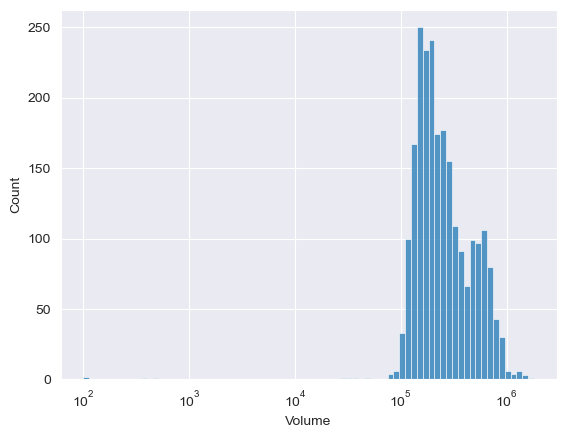

In [16]:
#Volume analysis
sns.histplot(Df.Volume, log_scale=True)
mean=statistics.mean(Df['Volume'])
stddev=statistics.stdev(Df['Volume'])
print("Mean =",mean)
print("Stddev =",stddev)

In [11]:
from scipy.stats import norm

Mean = 0.04775612463782716
Stddev = 1.1029456267262294


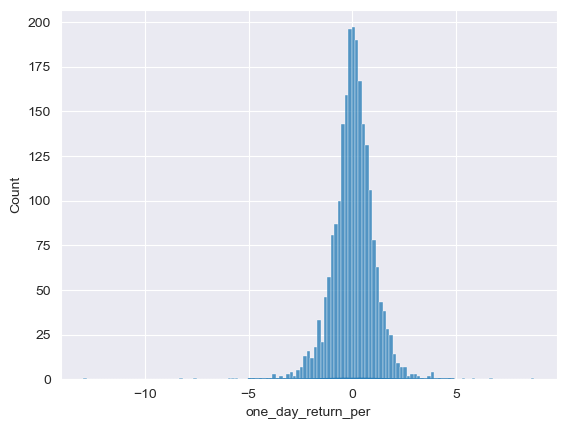

In [26]:
#1 day returns analysis
sns.histplot(Df.one_day_return_per)#tbh this one is better so am uncommenting it
plt.hist(Df.one_day_return_per, bins=150, density=True, alpha=0.5, color='b')
# Plot between -30 and 30 with
# 0.1 steps.
x_axis = np.arange(-5, 5, 0.1)
    
# Calculating mean and standard 
# deviation
mean=statistics.mean(Df['one_day_return_per'])
stddev=statistics.stdev(Df['one_day_return_per'])
print("Mean =",mean)
print("Stddev =",stddev)
plt.plot(x_axis, norm.pdf(x_axis, mean, stddev))
plt.show()
#Silimarly you can do for next one

In [27]:
Df.head()

,Open,Close,Volume,Prev_Close,Returns,one_day_return_per,five_day_rolling_return_per
Date,,,,,,,
2013-01-21,6085.750000,6082.299805,130900,6064.399902,17.899902,0.295164,0.192970
2013-01-22,6080.149902,6048.500000,129000,6082.299805,-33.799805,-0.555708,-0.026782
2013-01-23,6052.850098,6054.299805,137000,6048.500000,5.799805,0.095888,0.173466
2013-01-24,6046.200195,6019.350098,185200,6054.299805,-34.949707,-0.577271,-0.065536
2013-01-25,6024.500000,6074.649902,147600,6019.350098,55.299805,0.918701,0.033863


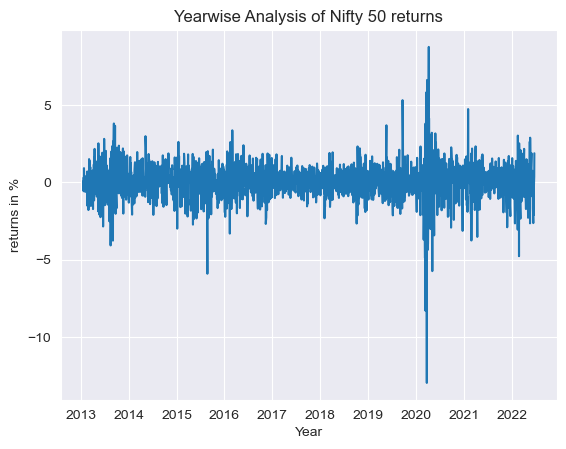

In [28]:
plt.plot(Df.one_day_return_per)
plt.title('Yearwise Analysis of Nifty 50 returns')
plt.xlabel('Year')
plt.ylabel('returns in %')
plt.show()

Mean = 0.042832802890032294
Stddev = 0.4922130960078735


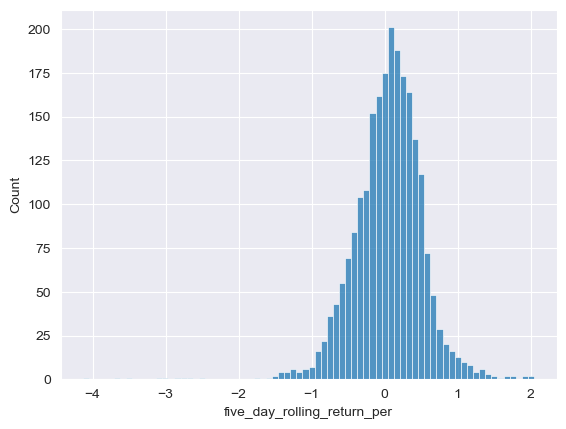

In [29]:
#5 day returns analysis
sns.histplot(Df.five_day_rolling_return_per)
mean=statistics.mean(Df['five_day_rolling_return_per'])
stddev=statistics.stdev(Df['five_day_rolling_return_per'])
print("Mean =",mean)
print("Stddev =",stddev)

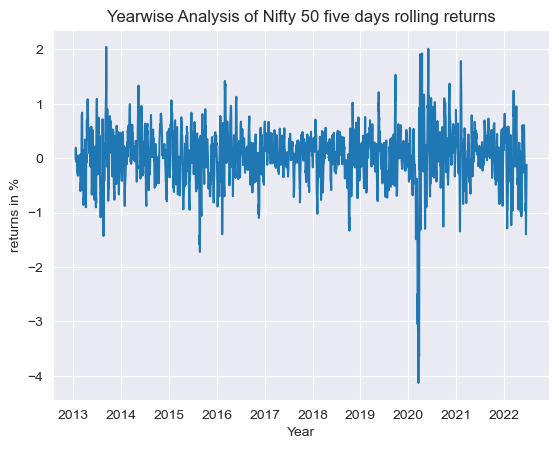

In [31]:
plt.plot(Df.five_day_rolling_return_per)
plt.title('Yearwise Analysis of Nifty 50 five days rolling returns')
plt.xlabel('Year')
plt.ylabel('returns in %')
plt.show()

In [32]:
#Testing for Normal Distribution using QQ Plot
import statsmodels.api as sm
import pylab

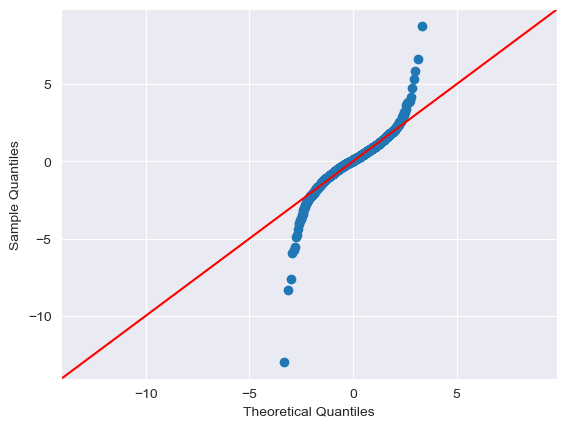

In [34]:
sm.qqplot(Df.one_day_return_per, line='45')
pylab.show()
#NO

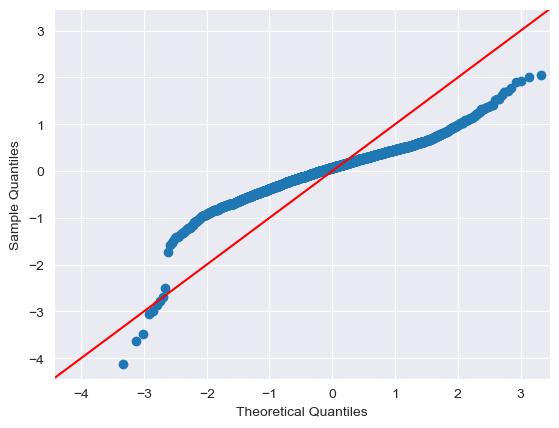

In [35]:

sm.qqplot(Df.five_day_rolling_return_per, line='45')
pylab.show()
#NO

In [36]:
#Testing for Normal Distribution using Kolmogorov Smirnov test
# If the P-Value of the KS Test is larger than 0.05, we assume a normal distribution
# If the P-Value of the KS Test is smaller than 0.05, we do not assume a normal distribution

from scipy.stats import kstest

In [37]:
ks_statistic, p_value = kstest(Df.one_day_return_per, 'norm')
print(ks_statistic, p_value)
#NO

0.07322532013112798 4.006869974619674e-11


In [38]:
ks_statistic, p_value = kstest(Df.five_day_rolling_return_per, 'norm')
print(ks_statistic, p_value)
#NO

0.20252941376282968 7.968182844429167e-83


In [39]:
#The Shapiro Wilk test is the most powerful test when testing for a normal distribution.
# If the P-Value of the Shapiro Wilk Test is larger than 0.05, we assume a normal distribution
# If the P-Value of the Shapiro Wilk Test is smaller than 0.05, we do not assume a normal distribution
from scipy.stats import shapiro

In [40]:
shapiro(Df.one_day_return_per)
#NO

ShapiroResult(statistic=0.9005625247955322, pvalue=3.3656396381294645e-36)

In [41]:
shapiro(Df.five_day_rolling_return_per)
#NO

ShapiroResult(statistic=0.9324548840522766, pvalue=5.253090062158047e-31)

In [42]:
#Reference - https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93 

In [44]:
#Since the above distribution is not normal so we will check for log normal distribution
#Well this cant be log normal since it takes negetive values too but its a curve duh use some smart tactic
data_1=np.array(Df['one_day_return_per'])
data_1=data_1+abs(data_1.min())+0.1 #This will make sure that the value of distribution is positive
#Now by definition of log normal
log_data_1=np.log(data_1)
data_5=np.array(Df['five_day_rolling_return_per'])
data_5=data_5+abs(data_5.min())+0.1 #This will make sure that the value of distribution is positive
#Now by definition of log normal
log_data_5=np.log(data_5)


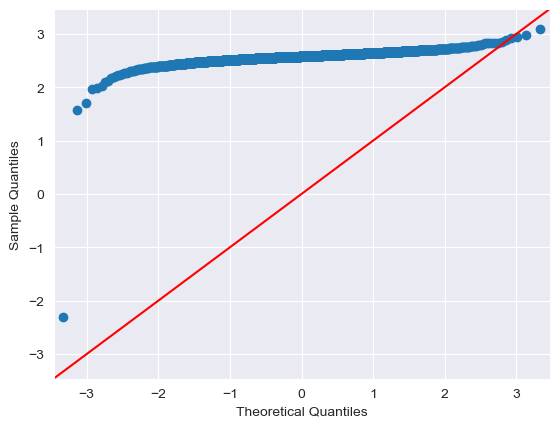

In [45]:
#Now check for test of normal distribution for log_data
sm.qqplot(log_data_1, line='45')
pylab.show()
#NO

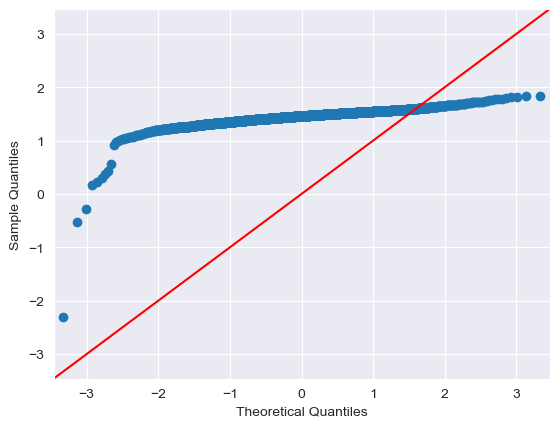

In [46]:
sm.qqplot(log_data_5, line='45')
pylab.show()
#NO

In [47]:
ks_statistic, p_value = kstest(log_data_1, 'norm')
print(ks_statistic, p_value)
#NO

0.9823582094125464 0.0


In [48]:
ks_statistic, p_value = kstest(log_data_5, 'norm')
print(ks_statistic, p_value)
#NO

0.8631784682301709 0.0


In [49]:
shapiro(log_data_1)
#NO

ShapiroResult(statistic=0.43406587839126587, pvalue=0.0)

In [50]:
shapiro(log_data_5)
#NO

ShapiroResult(statistic=0.6317228078842163, pvalue=0.0)

In [51]:
# date=[]
# for i in Df.T.columns:
#     date.append(str(i.year))
# Df['Date']=np.array(date)
# Df
Df['Date']=Df.index
Df
#bas yehi kar leta instead of itna mehnat

,Open,Close,Volume,Prev_Close,Returns,one_day_return_per,five_day_rolling_return_per,Date
Date,,,,,,,,
2013-01-21,6085.750000,6082.299805,130900,6064.399902,17.899902,0.295164,0.192970,2013-01-21
2013-01-22,6080.149902,6048.500000,129000,6082.299805,-33.799805,-0.555708,-0.026782,2013-01-22
2013-01-23,6052.850098,6054.299805,137000,6048.500000,5.799805,0.095888,0.173466,2013-01-23
2013-01-24,6046.200195,6019.350098,185200,6054.299805,-34.949707,-0.577271,-0.065536,2013-01-24
2013-01-25,6024.500000,6074.649902,147600,6019.350098,55.299805,0.918701,0.033863,2013-01-25
...,...,...,...,...,...,...,...,...
2022-06-15,15729.250000,15692.150391,183000,15732.099609,-39.949219,-0.253934,-0.824532,2022-06-15
2022-06-16,15832.250000,15360.599609,264700,15692.150391,-331.550781,-2.112845,-1.398999,2022-06-16
2022-06-17,15272.650391,15293.500000,342600,15360.599609,-67.099609,-0.436829,-1.153235,2022-06-17


In [52]:
#Now comparing the mean for 2 years period
#This is to check if the property of variables have changed over years 

mask = (Df['Date'] >= '2013-1-1') & (Df['Date'] < '2015-1-1')
Df1=Df.loc[mask]
mean_1=Df1['Open'].sum()-Df1['Close'].sum()
mask = (Df['Date'] >= '2015-1-1') & (Df['Date'] < '2017-1-1')
Df2=Df.loc[mask]
mean_2=Df2['Open'].sum()-Df2['Close'].sum()
mask = (Df['Date'] >= '2017-1-1') & (Df['Date'] < '2019-1-1')
Df3=Df.loc[mask]
mean_3=Df3['Open'].sum()-Df3['Close'].sum()
mask = (Df['Date'] >= '2019-1-1') & (Df['Date'] < '2021-1-1')
Df4=Df.loc[mask]
mean_4=Df4['Open'].sum()-Df4['Close'].sum()
mask = (Df['Date'] >= '2021-1-1') & (Df['Date'] < '2023-1-1')
Df5=Df.loc[mask]
mean_5=Df5['Open'].sum()-Df5['Close'].sum()
print('Mean in 2013-2014 range',mean_1)
print('Mean in 2015-2016 range',mean_2)
print('Mean in 2017-2018 range',mean_3)
print('Mean in 2019-2020 range',mean_4)
print('Mean in 2021-2022 range',mean_5)

Mean in 2013-2014 range 886.84716796875
Mean in 2015-2016 range 4595.1962890625
Mean in 2017-2018 range 3355.306640625
Mean in 2019-2020 range 5895.99560546875
Mean in 2021-2022 range 5105.794921875
